## Exercise: Pandas & NumPy with Student Performance Dataset
## Exercise: Pandas & NumPy with Student Performance Dataset

You are provided with three separate datasets, all originally derived from a single dataset. However, these datasets have undergone slight modifications through different processes. Your task is to analyze the datasets, identify the differences, and correctly merge them back together.

**Important Notes**:
- Some column names have been changed and need to be translated back.
- Certain categorical variables have altered values (e.g., some categories have been renamed).
- Check the distribution of numerical variables, as there may be discrepancies.
- Missing values are present in multiple columns and need to be imputed appropriately. Justify your choice of imputation method.
- Some columns have been stored in different data types (e.g., numbers as strings). Ensure that data types are correct before merging the datasets.

Your Task:
1. Load all three datasets into Python.
2. Identify differences and discrepancies between the datasets.
3. Reconstruct the original dataset by:
    - Adjusting column names and data types.
    - Correctly merging the datasets.
    - Handling missing values (imputation) and justifying your chosen method.
4. Save the final dataset as Merged_StudentData.csv.
5. Perform hypothesis tests to analyze relationships between the following variables: `Sleep_Hours`, `Exam_Score`, `Internet_Access`, `Hours_Studied`, and `Tutoring_Sessions`.

In [1]:
#1.
import pandas as pd
df1 = pd.read_csv("Student Data Part 1.csv")
df2 = pd.read_csv("Student Data Part 2.csv")
df3 = pd.read_csv("Student Data Part 3.csv")

In [2]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(6607, 6)
(5616, 7)
(6607, 5)


In [3]:
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

Student_ID                0
Study_Hours               0
Attendance                0
Rest_Hours              330
Parental_Involvement      0
Access_to_Resources       0
dtype: int64
Unnamed: 0             0
Student_ID             0
Internet_Access      281
Tutoring_Sessions    281
Family_Income          0
Teacher_Quality       66
School_Type            0
dtype: int64
Student_ID                    0
Final_Score                 330
Parental_Education_Level     90
Distance_from_Home           67
Gender                        0
dtype: int64


In [4]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['Student_ID', 'Study_Hours', 'Attendance', 'Rest_Hours',
       'Parental_Involvement', 'Access_to_Resources'],
      dtype='object')
Index(['Unnamed: 0', 'Student_ID', 'Internet_Access', 'Tutoring_Sessions',
       'Family_Income', 'Teacher_Quality', 'School_Type'],
      dtype='object')
Index(['Student_ID', 'Final_Score', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


In [5]:
print(df1.nunique())
print(df2.nunique())
print(df3.nunique())

Student_ID              6607
Study_Hours               41
Attendance                41
Rest_Hours                 7
Parental_Involvement       3
Access_to_Resources        3
dtype: int64
Unnamed: 0           5616
Student_ID           5616
Internet_Access         2
Tutoring_Sessions       9
Family_Income           3
Teacher_Quality         3
School_Type             2
dtype: int64
Student_ID                  6607
Final_Score                   44
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
dtype: int64


In [6]:
print(df1.dtypes)
print(df2.dtypes)
print(df3.dtypes)

Student_ID                int64
Study_Hours               int64
Attendance                int64
Rest_Hours              float64
Parental_Involvement     object
Access_to_Resources      object
dtype: object
Unnamed: 0             int64
Student_ID             int64
Internet_Access       object
Tutoring_Sessions    float64
Family_Income         object
Teacher_Quality       object
School_Type           object
dtype: object
Student_ID                    int64
Final_Score                 float64
Parental_Education_Level     object
Distance_from_Home           object
Gender                       object
dtype: object


In [7]:
print(df1.describe())
print(df2.describe())
print(df3.describe())

        Student_ID  Study_Hours   Attendance   Rest_Hours
count  6607.000000  6607.000000  6607.000000  6277.000000
mean   3304.000000    19.975329    79.977448     8.035049
std    1907.420946     5.990594    11.547475     1.466553
min       1.000000     1.000000    60.000000     5.000000
25%    1652.500000    16.000000    70.000000     7.000000
50%    3304.000000    20.000000    80.000000     8.000000
75%    4955.500000    24.000000    90.000000     9.000000
max    6607.000000    44.000000   100.000000    11.000000
        Unnamed: 0   Student_ID  Tutoring_Sessions
count  5616.000000  5616.000000        5335.000000
mean   3282.341168  3283.341168           1.488660
std    1910.720857  1910.720857           1.226585
min       0.000000     1.000000           0.000000
25%    1617.750000  1618.750000           1.000000
50%    3283.500000  3284.500000           1.000000
75%    4928.500000  4929.500000           2.000000
max    6606.000000  6607.000000           8.000000
        Student_ID 

In [8]:
#Reconstruct the original dataset by:
#Adjusting column names and data types.

In [9]:
print(df1.head())
print(df2.head())
print(df3.head())

   Student_ID  Study_Hours  Attendance  Rest_Hours Parental_Involvement  \
0           1           23          84         8.0                  Low   
1           2           19          64         9.0                  Low   
2           3           24          98         8.0               Medium   
3           4           29          89         9.0                  Low   
4           5           19          92         7.0               Medium   

  Access_to_Resources  
0                High  
1              Medium  
2              Medium  
3              Medium  
4              Medium  
   Unnamed: 0  Student_ID Internet_Access  Tutoring_Sessions Family_Income  \
0         743         744       Available                1.0        Medium   
1        5551        5552       Available                2.0           Low   
2        3442        3443       Available                1.0        Medium   
3        6571        6572       Available                0.0           Low   
4        4204  

In [10]:
df2.set_index("Student_ID", inplace=True)
df3.set_index("Student_ID", inplace = True)

In [11]:
df2.sort_index(level="Student_ID", inplace=True)
df3.sort_index(level="Student_ID", inplace=True)

In [12]:
df2["Internet_Access"] = df2["Internet_Access"].replace({"Available": "Yes", "Unavailable": "No"})
df3["Distance_from_Home"] = df3["Distance_from_Home"].replace({"Close": "Low", "Distant": "High"})

In [13]:
df2 = df2.drop(columns=["Unnamed: 0"])

In [14]:
#Correctly merging the datasets.
df_merged = df1.merge(df2, on="Student_ID", how="outer").merge(df3, on="Student_ID", how="outer")

In [15]:
df_merged.head()

,Student_ID,Study_Hours,Attendance,Rest_Hours,Parental_Involvement,Access_to_Resources,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Final_Score,Parental_Education_Level,Distance_from_Home,Gender
0,1,23,84,8.0,Low,High,Yes,0.0,Low,Medium,Public,65.0,High School,Low,Male
1,2,19,64,9.0,Low,Medium,Yes,2.0,Medium,Medium,Public,59.0,College,Medium,Female
2,3,24,98,8.0,Medium,Medium,Yes,2.0,Medium,Medium,Public,72.0,Postgraduate,Low,Male
3,4,29,89,9.0,Low,Medium,Yes,1.0,Medium,Medium,Public,69.0,High School,Medium,Male
4,5,19,92,7.0,Medium,Medium,NaN,NaN,NaN,NaN,NaN,68.0,College,Low,Female


In [16]:
#BlockingIOErrorHandling missing values (imputation) and justifying your chosen method.

In [17]:
missing_percent = (df_merged.isnull().sum() / len(df_merged) * 100).round()
print(missing_percent)
print(df_merged.head())

Student_ID                   0.0
Study_Hours                  0.0
Attendance                   0.0
Rest_Hours                   5.0
Parental_Involvement         0.0
Access_to_Resources          0.0
Internet_Access             19.0
Tutoring_Sessions           19.0
Family_Income               15.0
Teacher_Quality             16.0
School_Type                 15.0
Final_Score                  5.0
Parental_Education_Level     1.0
Distance_from_Home           1.0
Gender                       0.0
dtype: float64
   Student_ID  Study_Hours  Attendance  Rest_Hours Parental_Involvement  \
0           1           23          84         8.0                  Low   
1           2           19          64         9.0                  Low   
2           3           24          98         8.0               Medium   
3           4           29          89         9.0                  Low   
4           5           19          92         7.0               Medium   

  Access_to_Resources Internet_Access  

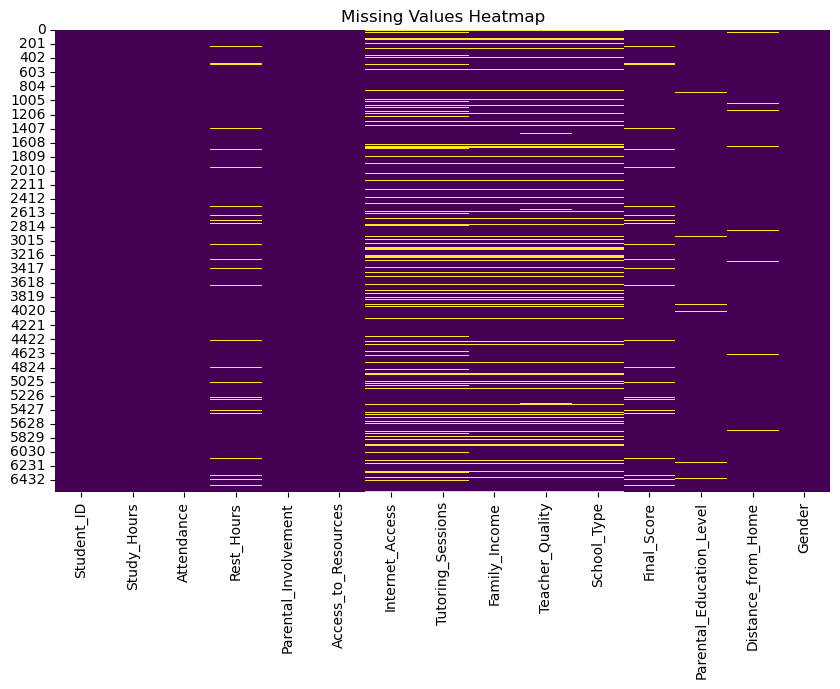

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_merged.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [19]:
#Variables needing imputation, their NA%, type of imputation and reasoning:
#Rest_Hours                   5.0%
    #Imputation method: Median Imputation
    #Reason: numerical variable with a relatively small amount of NAs; less sensitive towards outliers compared to mean imputation
#Internet_Access             19.0%
    #Imputation method: Mode Imputation
    #Reason: binary variable with a relatively large amount of NAs; in my opinion, internet access cannot easily be predicted /estimated by other variables or patterns
#Tutoring_Sessions           19.0%
    #Imputation method: KNN Imputation
    #Reason: numerical variable with a relatively large amount of NAs; in my opinion, can be estimated based on patterns in parental income and parental involvement
#Family_Income               15.0%
    #Imputation method: Mode Imputation
    #Reason: categorical variable with a relatively large amount of NAs; in my opinion, family income cannot easily be predicted /estimated by other variables or patterns
#Teacher_Quality             16.0%
    #Imputation method: Mode Imputation
    #Reason: categorical variable with a relatively large amount of NAs; in my opinion, teacher quality cannot easily be predicted /estimated by other variables or patterns
#School_Type                 15.0%
    #Imputation method: KNN Imputation
    #Reason: categorical variable with a relatively large amount of NAs;  in my opinion, school type cannot easily be predicted /estimated by other variables or patterns
#Final_Score                  5.0%
    #Imputation method: Iterative Computer
    #Reason: numerical variable with a relatively small amount of NAs; can be predicted based on study hours, attendance and rest hours
#Parental_Education_Level     1.0%
    #Imputation method: Mode Imputation
    #Reason: categorical variable with a relatively small amount of NAs
#Distance_from_Home           1.0%
    #Imputation method: Mode Imputation
    #Reason: categorical variable with a relatively small amount of NAs

In [20]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(strategy='median')
df_merged['Rest_Hours'] = imputer_median.fit_transform(df_merged[['Rest_Hours']])

In [21]:
imputer_mode = SimpleImputer(strategy='most_frequent')
df_merged['Internet_Access'] = imputer_mode.fit_transform(df_merged[['Internet_Access']]).flatten()

In [22]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

knn_imputer = KNNImputer(n_neighbors=5)
df_merged[['Tutoring_Sessions']] = knn_imputer.fit_transform(df_merged[['Tutoring_Sessions']])

In [23]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
df_merged[['Family_Income']] = mode_imputer.fit_transform(df_merged[['Family_Income']])

In [24]:
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
df_merged['Teacher_Quality'] = imputer_mode.fit_transform(df_merged[['Teacher_Quality']]).flatten()

In [25]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy="most_frequent")
df_merged[['School_Type']] = mode_imputer.fit_transform(df_merged[['School_Type']])

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
df_merged[['Final_Score']] = imputer.fit_transform(df_merged[['Final_Score']])

In [27]:
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
df_merged['Parental_Education_Level'] = imputer_mode.fit_transform(df_merged[['Parental_Education_Level']]).flatten()

In [28]:
from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
df_merged['Distance_from_Home'] = imputer_mode.fit_transform(df_merged[['Distance_from_Home']]).flatten()

In [29]:
print(df_merged.isnull().sum())

Student_ID                  0
Study_Hours                 0
Attendance                  0
Rest_Hours                  0
Parental_Involvement        0
Access_to_Resources         0
Internet_Access             0
Tutoring_Sessions           0
Family_Income               0
Teacher_Quality             0
School_Type                 0
Final_Score                 0
Parental_Education_Level    0
Distance_from_Home          0
Gender                      0
dtype: int64


### Hypotheses testing

Hypothesis 1: There is a positive correlation between the number of hours of sleep (Sleep_Hours) and the exam grade (Exam_Score).
- Remove potential outliers (e.g. students who sleep extremely little or extremely much, i.e. top and bottom 3 %).
- First check whether the variables are normally distributed. If not, apply Spearman correlation.

In [30]:
df_merged["Sleep_Hours"] = df_merged["Rest_Hours"]
df_merged["Exam_Score"] = df_merged["Final_Score"]
df_merged.drop(columns=["Rest_Hours", "Final_Score"], inplace=True)

In [31]:
df_merged.head()

,Student_ID,Study_Hours,Attendance,Parental_Involvement,Access_to_Resources,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Parental_Education_Level,Distance_from_Home,Gender,Sleep_Hours,Exam_Score
0,1,23,84,Low,High,Yes,0.00000,Low,Medium,Public,High School,Low,Male,8.0,65.0
1,2,19,64,Low,Medium,Yes,2.00000,Medium,Medium,Public,College,Medium,Female,9.0,59.0
2,3,24,98,Medium,Medium,Yes,2.00000,Medium,Medium,Public,Postgraduate,Low,Male,8.0,72.0
3,4,29,89,Low,Medium,Yes,1.00000,Medium,Medium,Public,High School,Medium,Male,9.0,69.0
4,5,19,92,Medium,Medium,Yes,1.48866,Medium,Medium,Public,College,Low,Female,7.0,68.0


In [32]:
#removing top and bottom 5%
lower_bound = df_merged["Sleep_Hours"].quantile(0.05)
upper_bound = df_merged["Sleep_Hours"].quantile(0.95)

df_clean = df_merged[(df_merged["Sleep_Hours"] >= lower_bound) & (df_merged["Sleep_Hours"] <= upper_bound)]

In [33]:
df_clean["Sleep_Hours"].describe()

count    6020.000000
mean        8.035050
std         1.168309
min         6.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: Sleep_Hours, dtype: float64

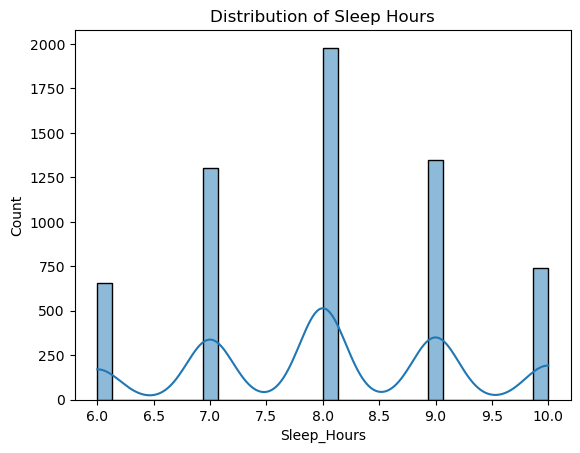

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_clean["Sleep_Hours"], kde=True, bins=30)
plt.title("Distribution of Sleep Hours")
plt.show()

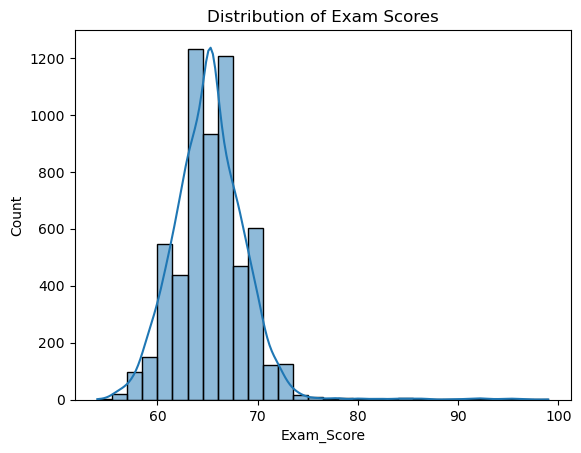

In [35]:
sns.histplot(df_clean["Exam_Score"], kde=True, bins=30)
plt.title("Distribution of Exam Scores")
plt.show()

In [36]:
#Exam Scores are right skewed, so we have to apply the Spearman correlation test:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_clean["Sleep_Hours"], df_clean["Exam_Score"])
print(f"Spearman Correlation: {corr}, p-value = {p_value}")

Spearman Correlation: -0.0003280089757800206, p-value = 0.9797004228460258


In [37]:
#No significant association between Sleep Hours and Exam Score

Hypothesis 2: Students with Internet access (Internet_Access) spend more time studying (Hours_Studied) than students without Internet access.
- Create a boxplot for visualization and check for outliers.
- Remove extreme values according to boxplot definition.

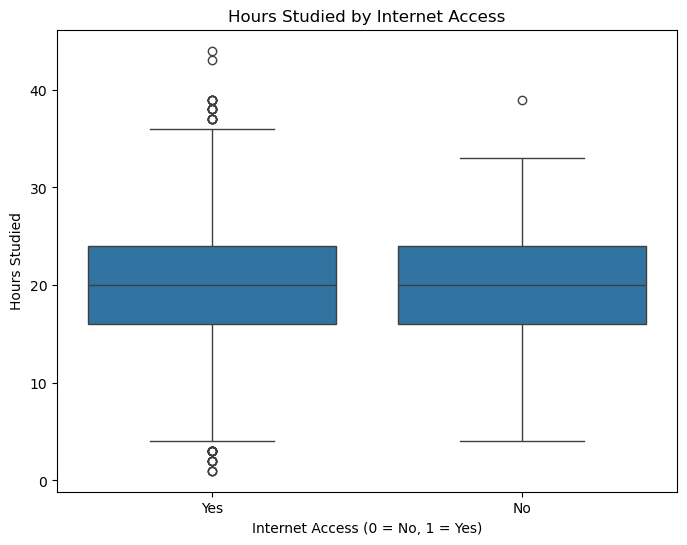

In [38]:
df_merged["Hours_Studied"] = df_merged["Study_Hours"]
df_merged.drop(columns=["Study_Hours"], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x="Internet_Access", y="Hours_Studied", data=df_merged)

plt.title("Hours Studied by Internet Access")
plt.xlabel("Internet Access (0 = No, 1 = Yes)")
plt.ylabel("Hours Studied")

plt.show()

In [39]:
Q1 = df_merged["Hours_Studied"].quantile(0.25)
Q3 = df_merged["Hours_Studied"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_merged[(df_merged["Hours_Studied"] >= lower_bound) & (df_merged["Hours_Studied"] <= upper_bound)]

In [40]:
import pandas as pd
from scipy.stats import ttest_ind

Access = df_cleaned[df_cleaned["Internet_Access"]== "Yes"]["Hours_Studied"]
No_Access = df_cleaned[df_cleaned["Internet_Access"]== "No"]["Hours_Studied"]

In [41]:
t_stat, p_value = ttest_ind(Access, No_Access, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 0.5011631458822883, p-value: 0.6165013470835043


In [42]:
#No significant association between Internet Access and Hours Studied

Hypothesis 3: Students who receive tutoring (Tutoring_Sessions) have higher exam grades than students without tutoring.

In [50]:
#Tutoring Session not normally distributed
from scipy.stats import spearmanr

corr, p_value = spearmanr(df_merged["Tutoring_Sessions"], df_merged["Exam_Score"])
print(f"Spearman Correlation: {corr:.4f}, p-value = {p_value:.4f}")

Spearman Correlation: 0.1310, p-value = 0.0000


In [ ]:
#Significant weak positive association between Tutoring Sessions and Exam Score